In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Для демонстрации инстументов визуализации используем [набор данных о чаевых](https://nagornyy.me/datasets/tips.csv).

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Визуализация распределения

[Seaborn](https://seaborn.pydata.org/) — это более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Для визуализации распределения метрических переменных используются следующие типы графиков:

* distplot
* jointplot
* rugplot
* kdeplot

Можно таже визуализировать относительные распределения между парами переменных при помощи методов:
* PairGrid
* pairplot
* FacetGrid

## distplot

distplot одновременно показывает гистограмму и график плотности распределения.

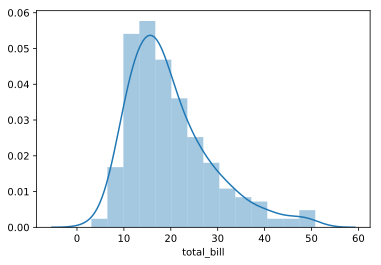

In [5]:
sns.distplot(tips['total_bill']);

Можно оставить только гистограмму:

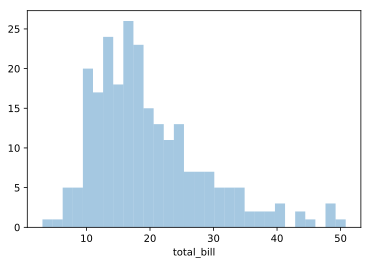

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=30);

## jointplot

Функция jointplot() показывает совместное распределение по двум переменным. Она имеет параметр **kind** который может принимать следующие значения: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

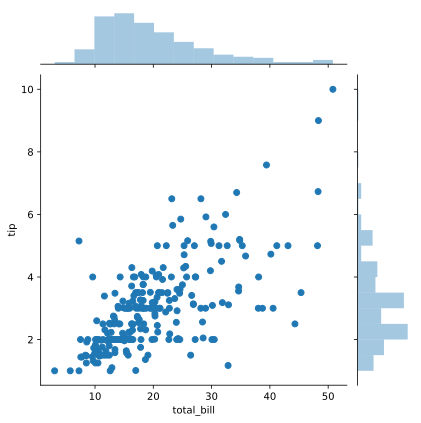

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter');

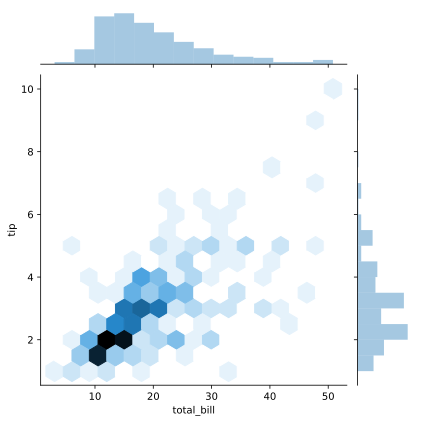

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex');

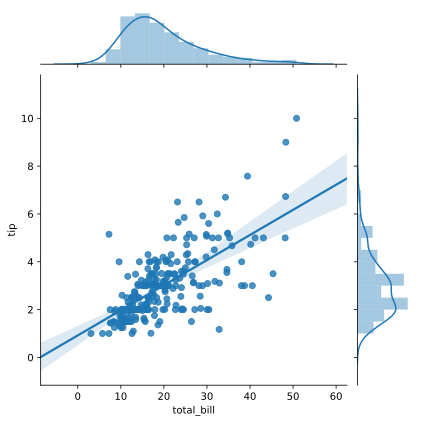

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

### pairplot

pairplot показывает отношения между всеми парами переменных.

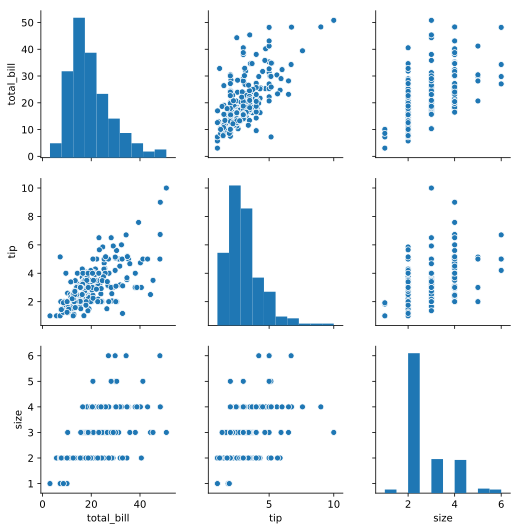

In [10]:
sns.pairplot(tips);

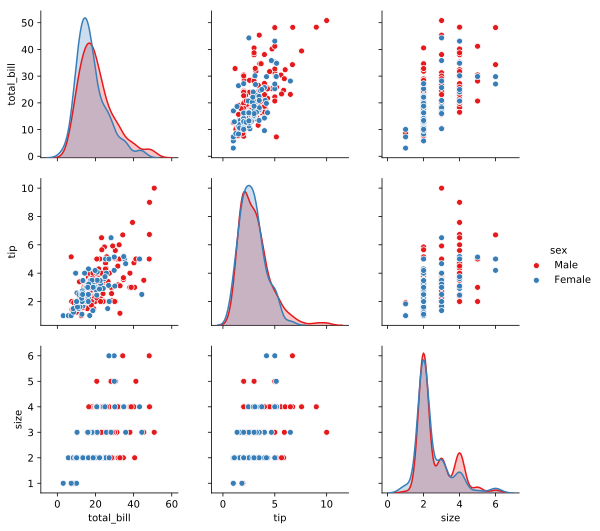

In [11]:
sns.pairplot(tips, hue='sex', palette='Set1');

По сути pairplot — это упрощённая версия другой функции, которая называется PairGrid.

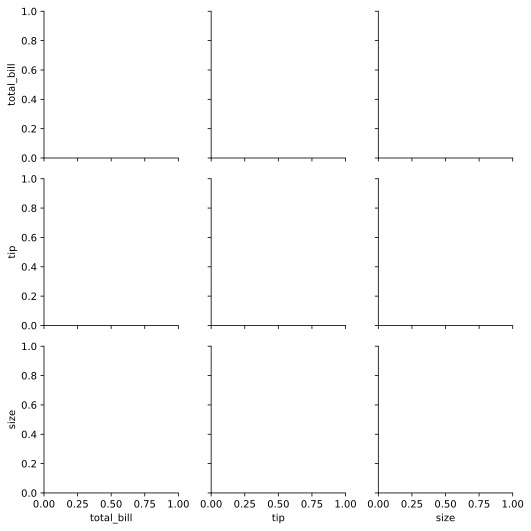

In [12]:
sns.PairGrid(tips);

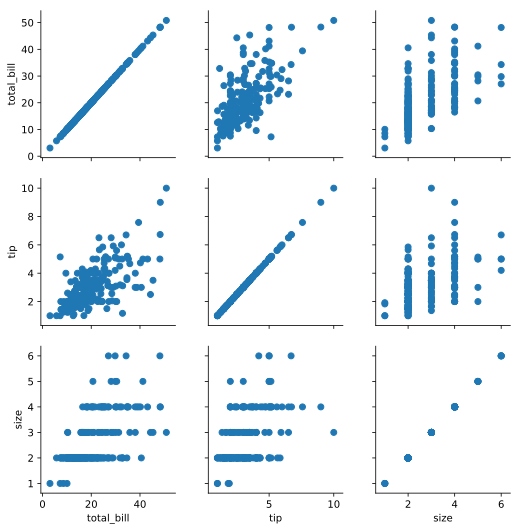

In [13]:
g = sns.PairGrid(tips)
g.map(plt.scatter);

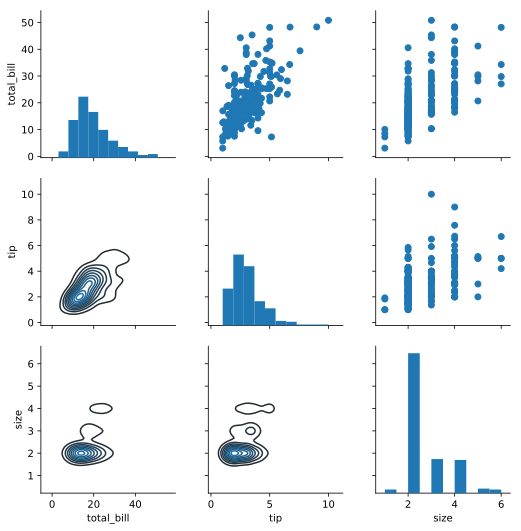

In [14]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

Плотность распределения по двум переменным даёт нам градиент. Градиент — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины $\varphi$ , значение которой меняется от одной точки пространства к другой (скалярного поля), а по величине (модулю) равный скорости роста этой величины в этом направлении.

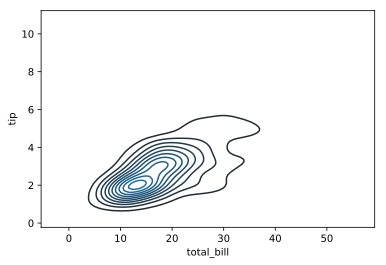

In [15]:
sns.kdeplot(tips['total_bill'], tips['tip']);

### Facet Grid

Facet Grid позволяет визуализировать совместное распределение отдельных признаков нескольких переменных.

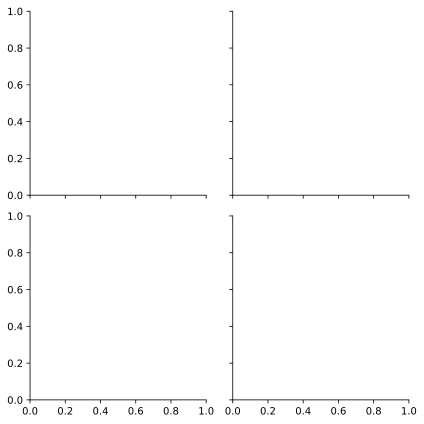

In [16]:
g = sns.FacetGrid(tips, col="time", row="smoker");

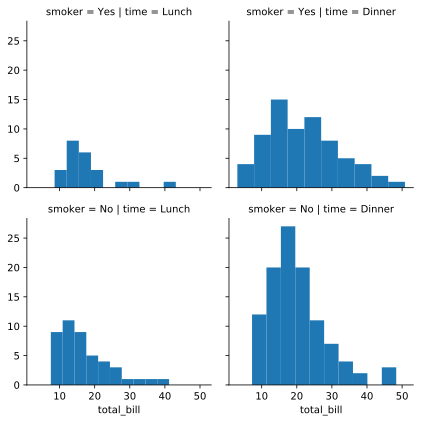

In [17]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill");

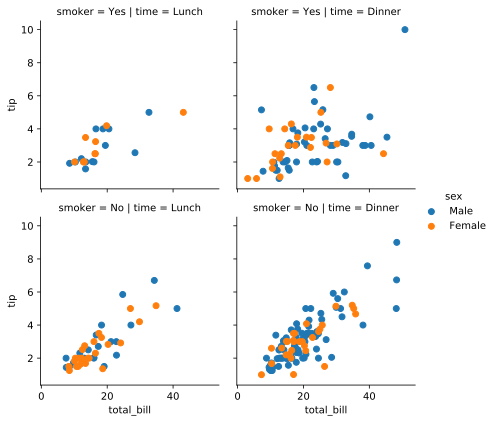

In [18]:
g = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend();

### rugplot

rugplot показывает то же, что и график плотности распределения, только в одномерной форме. Чем плотнее расположены линии, тем выше плотность. Лучше использовать его совместно с другими видами графиков.

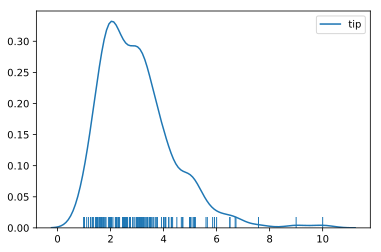

In [19]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip']);

## Визуализация категориальных данных

В seaborn встроены функции для визуализации категориальных данных в следующих форматах:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

В качестве тестового набора данных возьмём данные о чаевых, которые поставляются вместе с seaborn:

### barplot

Первый тип визуализации — это barplot. У нас есть категориальная переменная и её цифровое значение. Барплот аггрегирует данные по значениям категориальной переменной и применяет определённую функцию к значениям соответсвующих групп цифровой переменной. По умолчанию эта функция — среднее.

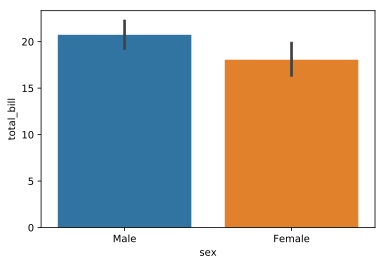

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips);

Эту функцию можно изменить в аргументе `estimator`:

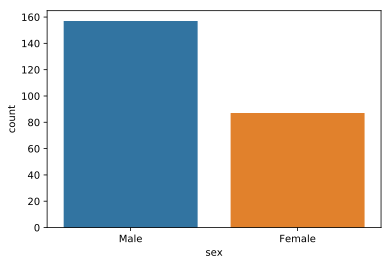

In [21]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=len)
sns.countplot(x='sex', data=tips);

Здесь мы считаем стандартное отклоенение.

### countplot

То же самое, что и барплот, только функция уже явно задана, и она считает количество значений в каждой категории.

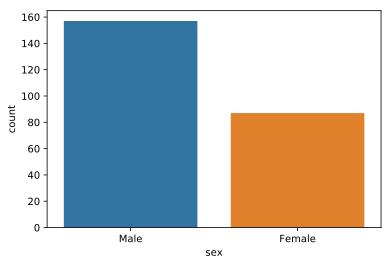

In [22]:
sns.countplot(x='sex', data=tips);

<span style="color:red">**Промежуточное задание 1. Постройте при помощи barplot точно также график, как с помощью countplot.**</span>

### boxplot и violinplot

Эти два графика используются для изучения формы распределения.

#### boxplot

Другое название boxplot — ящик с усами или диаграмма размаха. Он был разработан Джоном Тьюки в 1970-х годах.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

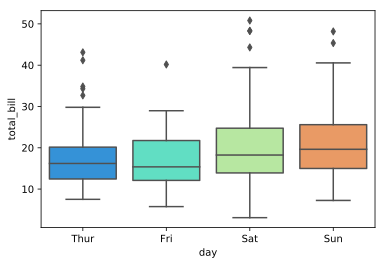

In [26]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow');

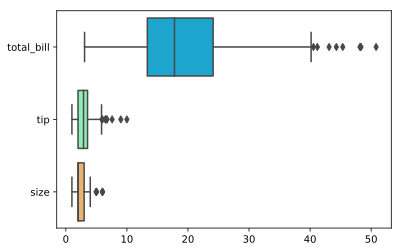

In [25]:
sns.boxplot(data=tips, palette='rainbow', orient='h');

Можно ввести в график третье измерение:

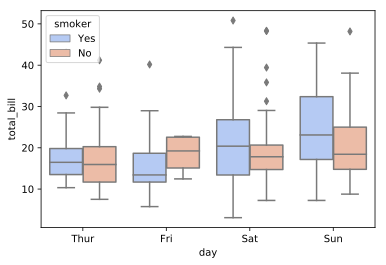

In [27]:
sns.boxplot(
    x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm");

#### violinplot

Выполняет ту же функцию, что и boxplot. По сути это два повёрнутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом.

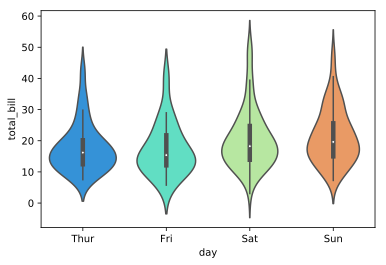

In [28]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow');

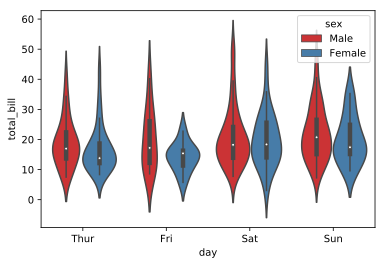

In [29]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1');

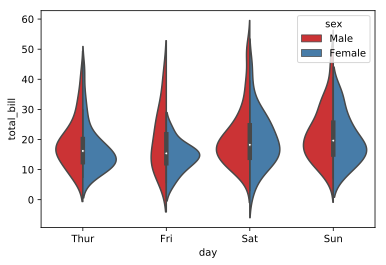

In [30]:
sns.violinplot(
    x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1');

### stripplot и swarmplot

stripplot рисует диаграмму рассеяния, состоящую из одной категориальной переменной. Его можно использовать как самостоятельную фигуру, но лучше сочетать с другими графиками.

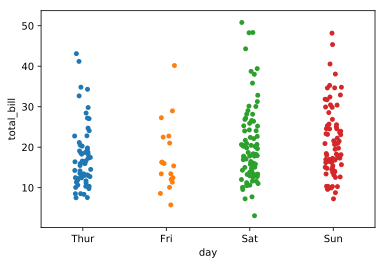

In [31]:
sns.stripplot(x="day", y="total_bill", data=tips);

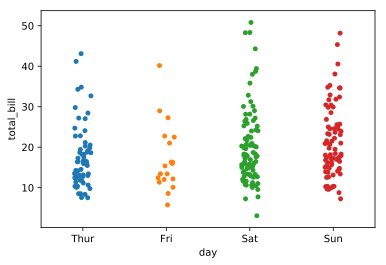

In [32]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

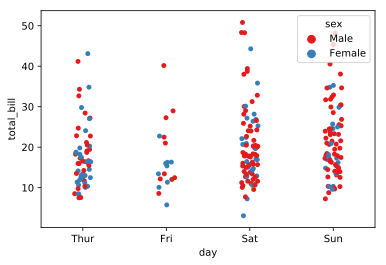

In [33]:
sns.stripplot(
    x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1');

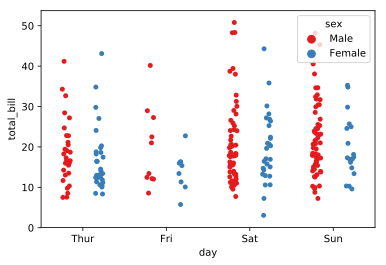

In [34]:
sns.stripplot(
    x="day",
    y="total_bill",
    data=tips,
    jitter=True,
    hue='sex',
    palette='Set1',
    dodge=True);  # раньше назывался split

Swarmplot представляет собой ровно то же самое, с той лишь разницей, что точки не накладываются друг на друга.

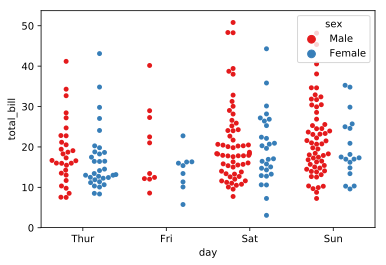

In [35]:
sns.swarmplot(
    x="day", y="total_bill", hue='sex', data=tips, palette="Set1", dodge=True);

Как говорилась ранее, эти типы графиков можно комбинировать с другими. Лучше всего это делать с violinplot.

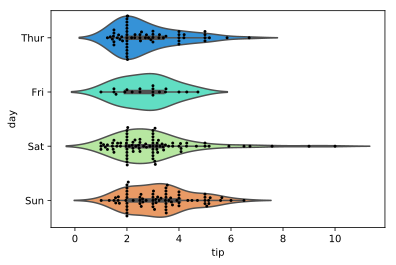

In [36]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3);

### catplot (ранее factorplot)

Из документации: *The default plot that is shown is a point plot, but other seaborn
categorical plots can be chosen with the ``kind`` parameter, including
box plots, violin plots, bar plots, or strip plots.*

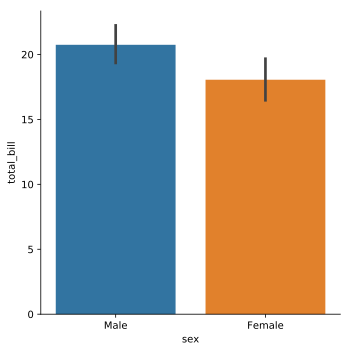

In [38]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar');

## Матричные графики

### Тепловая карта

In [39]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


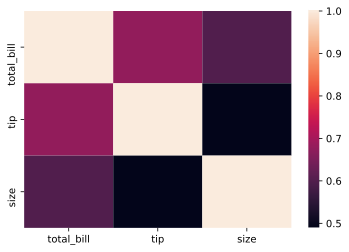

In [41]:
sns.heatmap(tips.corr());

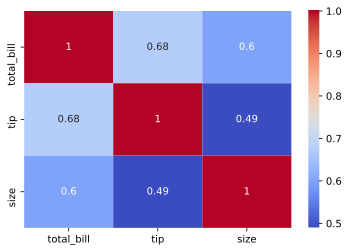

In [42]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True);

Загрузим данные о полётах:

In [43]:
flights = sns.load_dataset('flights');

In [44]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Посчитаем таблицу сопряжённости, которая покажет, какое количество пассажиров летало в различные месяцы в каждый из годов в промежутке от 1949 по 1960.

In [45]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


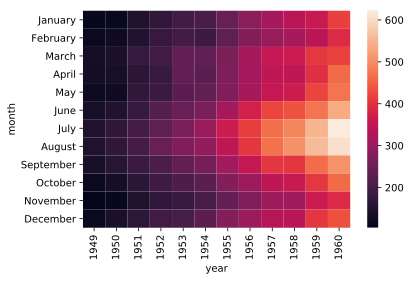

In [47]:
pvflights = flights.pivot_table(
    values='passengers', index='month', columns='year')
sns.heatmap(pvflights);

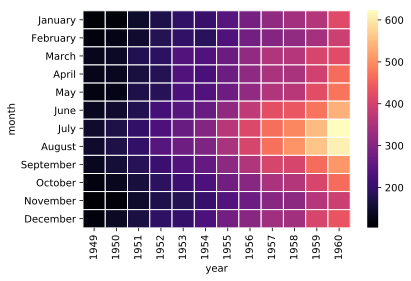

In [48]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1);

### clustermap

Использует алгоритмы иерархической кластеризации для создания визуализации. Можно задавать различные методы кластеризации. [Документация](http://seaborn.pydata.org/generated/seaborn.clustermap.html).

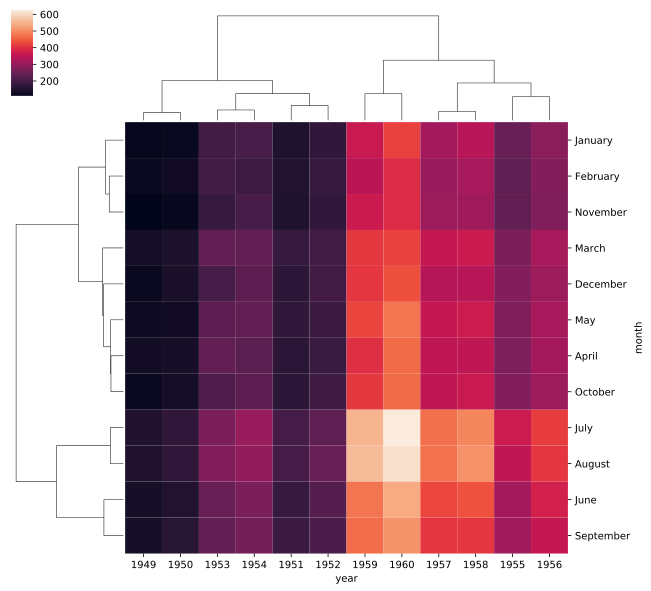

In [49]:
sns.clustermap(pvflights);

## Стили графиков

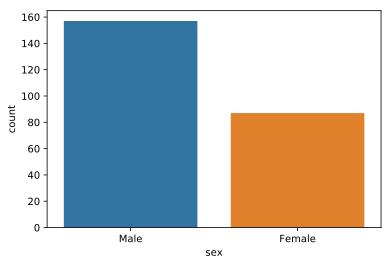

In [50]:
sns.countplot(x='sex', data=tips);

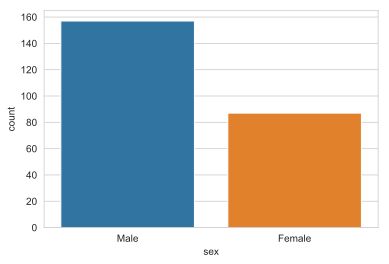

In [51]:
sns.set_style('whitegrid')  # Другие значения: darkgrid, whitegrid, dark, white, ticks
sns.countplot(x='sex', data=tips);

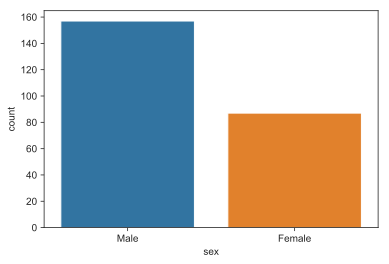

In [52]:
sns.set_style("ticks", {"xtick.major.size": 18, "ytick.major.size": 18})
sns.countplot(x='sex', data=tips);

Все переметры стиля можно посмотреть следующим образом:

In [53]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Если необходимо применить стиль только к одному графику, для этого следует использовать менеджер контекста with

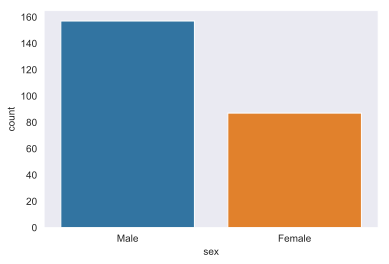

In [54]:
with sns.axes_style("dark"):
    sns.countplot(x='sex', data=tips);

Можно удалить линии осей при помощи метода despine

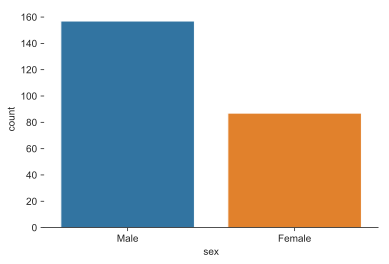

In [55]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

Размеры задаются так же, как и в обычном matplotlib.

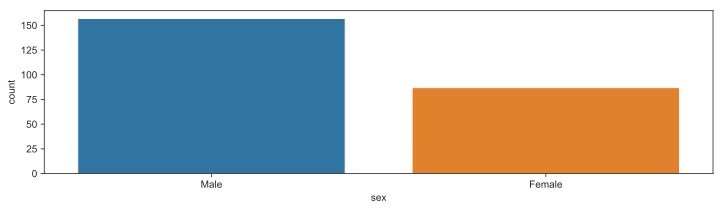

In [57]:
plt.figure(figsize=(12, 3))
sns.countplot(x='sex', data=tips);

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


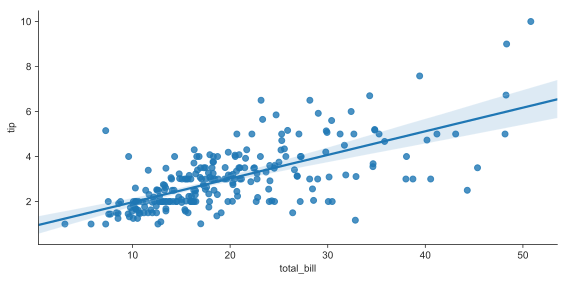

In [58]:
sns.lmplot(x='total_bill', y='tip', size=4, aspect=2, data=tips);

## Использование Seaborn совместно с matplotlib

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


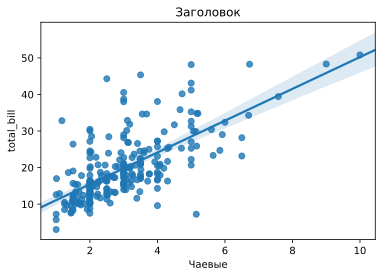

In [7]:
fig, ax = plt.subplots()
sns.regplot("tip", "total_bill", data=tips, ax=ax)
ax.set_title("Заголовок")
plt.xlabel('Чаевые')
fig.savefig("filename.png", dpi=200)